# Introduction to Machine Learning
### Workshop 3 of DASIL's series on "Data Science with Python"
### Created by Yusen He & Martin Pollack

In this Jupyter notebook we will give you a quick introduction on how to fit machine learning models in Python with the `scikit-learn` package. 

Next week we will go much more into depth.

In [4]:
import pandas as pd
from sklearn import datasets

## Supervised Learning - Regression

#### Dataset introduction

Remember that in a regression problem the outcome variable is numeric and continuous. However, the predictor variables can either be continuous or discrete.

An example of a regression problem can be found in the diabetes dataset within sklearn. Our outcome is a quantitative measure of disease progression that takes on numbers between 25 and 346.

In [5]:
diabetes = datasets.load_diabetes(as_frame=True)

`diabetes` is a special scikit-learn dataset. Its `target` field is a pandas Series with our continuous outcome variable.

In [6]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
print(min(diabetes.target))
print(max(diabetes.target))

25.0
346.0


And its `data` field is a pandas Dataframe of all of our potential predictor variables.

In [4]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### Define the predictor variable set and a target



For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [7]:
X = diabetes.data
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
Y = diabetes.target
Y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

#### Splitting the dataset into Training and Test data

To evaluate the performance of our models, we need to randomly split our features dataset `X` and outcomes `Y` into a training set `X_train`/`y_train` and testing set `X_test`/`Y_test`. Randomly, we will use some observations to train our models and others see how our model generalizes to new data.

The `sklearn.model_selection.train_test_split()` does the random split for the training and testing dataset.

The `test_size` option controls the size of the test set. The `random_state` parameter controls the shuffling applied which can be ignored in this work

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(442, 10)
(331, 10)
(111, 10)
(442,)
(331,)
(111,)


#### Linear Regression

Let's fit our first machine learning model!

At a minimum this process takes two steps.

First we create the model object, specifying any hyperparameters. In this case we want to use the `LinearRegression` object from `sklearn.linear_model`.

In [11]:
from sklearn.linear_model import LinearRegression
regressor_LinReg = LinearRegression()

Second we have to actually fit the linear regression model using our training data. This is done by calling the `fit()` method on our model object.

In [12]:
regressor_LinReg.fit(X_train,Y_train)

LinearRegression()

Make predictions on test dataset

In [ ]:
GLM_pred = regressor_LinReg.predict(X_test)

#### Artificial Neural Network for regression

Set up the artifical neural network model. Name it as `regressor`. Define the number of hidden layers.

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

regressor_ANN_default = MLPRegressor(solver='lbfgs', max_iter=2000, learning_rate_init=0.000001,hidden_layer_sizes=(40,1), random_state=1)

In [10]:
regressor_ANN_default.fit(X_train, Y_train)
regressor_ANN_default.score(X_test, Y_test)

0.34888647829370967

Tuning the Parameters in our NN

In [13]:
parameters = {'solver':['lbfgs'], 'learning_rate_init':[0.001], 'hidden_layer_sizes':[(200,1)]}
regressor_ANN_tuned_grid = GridSearchCV(regressor_ANN_default, parameters)

#regressor_ANN_tuned_grid.fit(X_train,Y_train)
#This is a lot of results
#print(regressor_ANN_tuned_grid.cv_results_)
#This is less (but more important)
#ANN_pred = regressor_ANN_tuned_grid.predict(X_test)


In [14]:
regressor_ANN_tuned_grid.fit(X_train, Y_train)

GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(40, 1),
                                    learning_rate_init=1e-06, max_iter=2000,
                                    random_state=1, solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(200, 1)],
                         'learning_rate_init': [0.001], 'solver': ['lbfgs']})

In [15]:
regressor_ANN_tuned_grid.best_estimator_

MLPRegressor(hidden_layer_sizes=(200, 1), max_iter=2000, random_state=1,
             solver='lbfgs')

In [11]:
ANN_pred

array([281., 220., 178.,  72., 200., 281.,  72., 202., 200., 200., 200.,
       220.,  71.,  72., 220.,  71., 200.,  72.,  72., 220.,  71., 200.,
       202., 200., 220., 109.,  48.,  72., 200.,  91., 202.,  72., 200.,
       200.,  84., 200.,  91.,  91., 200., 220.,  72., 220., 109., 200.,
       220.,  72.,  72., 200.,  91., 220.,  71.,  71., 200.,  91., 258.,
       220., 220.,  72.,  84., 220., 200., 200.,  91.,  91., 281., 200.,
        72., 220., 220.,  72.,  72.,  91.,  71.,  72.,  71., 220.,  91.,
       220., 220., 109., 109., 220.,  72., 220.,  71.,  72.,  72., 220.,
        72., 202.,  72.,  71.,  72.,  91.,  72.,  72., 281., 109.,  71.,
       202., 200.,  72., 220.,  84., 220.,  91., 220., 220.,  72.,  71.,
       202.])

Fit the ANN model using the input `X_train` and output `y_train`

In [ ]:
regressor_ANN.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(250, 1), random_state=1)

Making predictions on the test set

In [ ]:
ANN_pred = regressor_ANN.predict(X_test)

#### Support Vector Machine Regression

Set up the support vector machine for regression. Name it as `regressor_SVR`. Use `rbf` as the kernel function.

In [ ]:
from sklearn.svm import SVR
# Your code here


Fit the SVR model using the input `X_train` and output `y_train`

In [ ]:
# Your code here


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Make predictions on the test set

In [ ]:
# your code here

#### Performance Assessment

*   Mean Absolute Error
*   Mean Absolute Percentage Error
*   Mean Square Error
*   Root-Mean-Square Error

First, let's compute Mean Absolute Error (MAE) for predictions

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE_GLM = mean_absolute_error(y_test, GLM_pred)
MAE_SVR = mean_absolute_error(y_test, SVR_pred)
MAE_ANN = mean_absolute_error(y_test, ANN_pred)

print("The MAE of predictions provided by GLM is :")
print(MAE_GLM)

print("The MAE of predictions provided by SVR is :")
print(MAE_SVR)

print("The MAE of predictions provided by ANN is :")
print(MAE_ANN)


The MAE of predictions provided by GLM is :
45.120987683251
The MAE of predictions provided by SVR is :
52.45903046955925
The MAE of predictions provided by ANN is :
53.306306306306304


Second, let's compute Mean Absolute Percentage Error (MAPE) for predictions

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_GLM = mean_absolute_percentage_error(y_test, GLM_pred)
MAPE_SVR = mean_absolute_percentage_error(y_test, SVR_pred)
MAPE_ANN = mean_absolute_percentage_error(y_test, ANN_pred)

print("The MAPE of predictions provided by GLM is :")
print(MAPE_GLM)

print("The MAPE of predictions provided by SVR is :")
print(MAPE_SVR)

print("The MAPE of predictions provided by ANN is :")
print(MAPE_ANN)

The MAPE of predictions provided by GLM is :
0.37961401187552524
The MAPE of predictions provided by SVR is :
0.4218772291282973
The MAPE of predictions provided by ANN is :
0.3592407768614211


Third, let's compute Mean Square Error (MSE) for predictions

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_GLM = mean_squared_error(y_test, GLM_pred)
MSE_SVR = mean_squared_error(y_test, SVR_pred)
MSE_ANN = mean_squared_error(y_test, ANN_pred)

print("The MSE of predictions provided by GLM is :")
print(MSE_GLM)

print("The MSE of predictions provided by SVR is :")
print(MSE_SVR)

print("The MSE of predictions provided by ANN is :")
print(MSE_ANN)

The MSE of predictions provided by GLM is :
3180.1988368427265
The MSE of predictions provided by SVR is :
4277.196345895227
The MSE of predictions provided by ANN is :
5218.369369369369


Last, let's compute Root-Mean-Suqare-Error (RMSE) for predictions

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE_GLM = mean_squared_error(y_test, GLM_pred, squared=False)
RMSE_SVR = mean_squared_error(y_test, SVR_pred, squared=False)
RMSE_ANN = mean_squared_error(y_test, ANN_pred, squared=False)

print("The RMSE of predictions provided by GLM is :")
print(RMSE_GLM)

print("The RMSE of predictions provided by SVR is :")
print(RMSE_SVR)

print("The RMSE of predictions provided by ANN is :")
print(RMSE_ANN)

The RMSE of predictions provided by GLM is :
56.39325169594964
The RMSE of predictions provided by SVR is :
65.4002778732264
The RMSE of predictions provided by ANN is :
72.23828188273424


## Supervised Learning - Classification

#### Dataset Introduction

Now let's look at a classification problem, where the outcome can only take on 2 or more discrete values. But of course our predictors can be either continuous or discrete.

Now we use `scikit-learn`'s breast cancer dataset. Here the outcome can take on a 0, for no breast cancer, or 1, for breast cancer. 

So in this case we actually have a *binary classification* problem, meaning our category can only take on 2 discrete values. In most binary classification problems, like in this case, the categories are 0 and 1 indiciating the presence or absence of some trait.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)

In [ ]:
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Define the predictor variable set and a target


For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [ ]:
X = pd.DataFrame(breast_cancer['data'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = pd.DataFrame(breast_cancer['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#### Split the dataset into training and test set

The `sklearn.model_selection.train_test_split` does the random split for the training and testing dataset.

Note: Here, `stratify` means the test set has equal numbers of 0 & 1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y,  random_state=0)

To evaluate the model performance, we need to randomly split the feature set `X` and the target set `y` into the training set `X_train` & `y_train` and test set `X_test` & `y_test`

The `test_size` option controls the size of the test set. The `random_state` parameter controls the shuffling applied which can be ignored in this work

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.11010,0.15080,0.22980,0.04970,0.2767,0.07198
232,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.113800,0.085340,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.13860,0.28830,0.19600,0.14230,0.2590,0.07779
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
166,10.80,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,11.92,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.042740,0.1820,0.06850,...,12.98,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251


In [ ]:
y_train

,target
246,1
232,1
15,0
128,1
262,0
...,...
82,0
166,1
342,1
445,1


In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
460,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,...,22.960,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,14.490,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,13.780,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
370,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.14150,0.46650,0.70870,0.22480,0.4824,0.09614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.310,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.990,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
150,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,14.160,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
511,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,...,15.610,17.58,101.70,760.2,0.11390,0.10110,0.11010,0.07955,0.2334,0.06142


In [ ]:
y_test

,target
460,0
135,0
62,0
485,1
370,0
...,...
434,1
100,0
150,1
511,1


#### XGBoost for Binary Classification

Set up the XGBoost model. Name it as `classifier_XGB`

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifier_XGB

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Fit the XGBoost model using the input `X_train` and output `y_train`


In [ ]:
classifier_XGB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Make predictions on test dataset

In [ ]:
XGB_pred = classifier_XGB.predict(X_test)
XGB_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

#### Support Vector Machine for Binary Classification

Set up the SVM model. Name it as `classifier_SVM`

In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(gamma='auto')
classifier_SVM

SVC(gamma='auto')

Fit the SVM model using the input `X_train` and output `y_train`


In [ ]:
classifier_SVM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

Make predictions on test dataset

In [ ]:
SVM_pred = classifier_SVM.predict(X_test)
SVM_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Performance Assessment

*   Accuracy
*   Sensitivity
*   Specificity
*   AUC

First, let's compute the confusion matrix for predictions

For example: for Naive Bayes's prediction, we have:

In [ ]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmNB = confusion_matrix(y_test,NB_pred)
print('Confusion Matrix for Naive Bayes: \n', cmNB)
#Compute total test cases
totalNB=sum(sum(cmNB))
#####from confusion matrix calculate accuracy
accuracyNB=(cmNB[0,0]+cmNB[1,1])/totalNB
print ('Accuracy for Naive Bayes: ', accuracyNB)

sensitivityNB = cmNB[0,0]/(cmNB[0,0]+cmNB[0,1])
print('Sensitivity for Naive Bayes: ', sensitivityNB)

specificityNB = cmNB[1,1]/(cmNB[1,0]+cmNB[1,1])
print('Specificity for Naive Bayes: ', specificityNB)

Confusion Matrix for Naive Bayes: 
 [[ 57   7]
 [  6 101]]
Accuracy for Naive Bayes:  0.9239766081871345
Sensitivity for Naive Bayes:  0.890625
Specificity for Naive Bayes:  0.9439252336448598


Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [ ]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the Naive Bayes classifier
NB_prob = classifier_NB.predict_proba(X_test)

#We compute the AUC score
aucNB = roc_auc_score(y_test,NB_prob[:,1])
print('AUC for Naive Bayes: ', aucNB)

AUC for Naive Bayes:  0.9767815420560748


## Unsupervised Learning - Clustering

#### Dataset Introduction

Lastly we want to consider an unsupervised learning problem, where we don't actually have an outcome at all, or our data is "unlabeled." Instead of predicting something we just want to find patterns and structure in our data.

Our data can be unlabeled for two reasons:

• First, maybe our data does not have well-defined groupings. An example might be a company's customers: there are not clear and distinct groups that we can put people in. 

• Second, maybe the label of our data is missing. Suppose you are a wine vendor and you ordered three types of wine from your supplier. When you receive your wine shipment, however, you realize that the labels were not put on. You may want to learn about how the different wine bottles are related to one another to make an educated guess on which is what wine type.

Our example below falls in this second case.

In [23]:
wine = datasets.load_wine(as_frame=True)

In [ ]:
wine.data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Initialize the dataset

Initialize the dataset as `X`

In [24]:
X= wine.data

In [60]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

#### Clustering using K-Means algorithm

##### Intialize the K-Means Algorithm

The K-Mean algorithm is included in the Scikit-leanr library. Define the number of clusters by `n_clusters` and random initialization state.

In [25]:
from sklearn.cluster import KMeans
#Here we set n=3 in this workshop
cluster_KMeans = KMeans(n_clusters =3, random_state=0)
cluster_KMeans

KMeans(n_clusters=3, random_state=0)

##### Fit and predict using K-Mean algorithm



Fit the dataset

In [ ]:
cluster_KMeans.fit(X)

KMeans(n_clusters=3, random_state=0)

Prediction

In [ ]:
cluster_labels = cluster_KMeans.predict(X)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

Compute inner cluster distances (Euclidean distances) within all clusters

In [ ]:
cluster_KMeans.inertia_

2370689.686782969

##### Find the BEST k

Now, let's try different numbers of k to see how cluster centers change

In [46]:
#Store the sum of inner cluster distances in a list and name is as dist
dist=[]

for i in range(2,11):
  #Run k-mean clustering with i centers
  cluster_KMeans = KMeans(n_clusters =i, random_state=0)
  cluster_KMeans.fit(X)
  #Store the summed inner cluster distances into the list namely 'dist'
  dist.append(cluster_KMeans.inertia_)

Display the inner cluster distances for all k

In [ ]:
dist

[4543877.621627203,
 2370689.686782969,
 1331920.430684771,
 916415.1871539169,
 647362.0020260848,
 412137.5091004584,
 324553.044355034,
 270954.9292415376,
 217887.37856033302]

Now, let's use `matplotlib` library to visualize the inner cluster distances

In [28]:
import matplotlib.pyplot as plt

We can plot the inner cluster distance curve and use Elbow's method to seek for optimal k

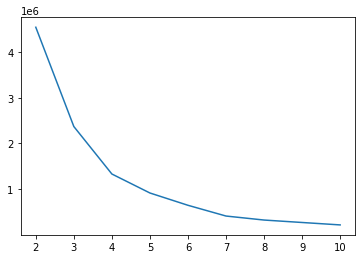

In [47]:
import pandas as pd
import numpy as np

elbowPlot = pd.DataFrame(dist)
elbowPlot.rename(columns={0: "Inner cluster distance"}, inplace=True)
elbowPlot["Number of Clusters"] = np.arange(2, 11)

plt.plot(elbowPlot["Number of Clusters"], elbowPlot["Inner cluster distance"])
plt.show()

#### DBSCAN

The DBSCAN algorithm is included in the cluster subdirectory of scikit-learn.

To create the model, we need to decide our radius factor, `eps`, which tells us how large we think our clusters will be, and the minimum number of samples we want included in each cluster.

In [104]:
from sklearn.cluster import DBSCAN

cluster_DBSCAN = DBSCAN(eps=40, min_samples=20)
cluster_DBSCAN

DBSCAN(eps=40, min_samples=20)

Fit the DBSCAN algorithm to our data

In [105]:
cluster_DBSCAN.fit(X)

DBSCAN(eps=40, min_samples=20)

In [106]:
DBSCAN_predict = cluster_DBSCAN.fit_predict(X)

How many clusters do we have? And what are they?

In [107]:
print(len(set(DBSCAN_predict)))
print(np.unique(DBSCAN_predict, return_counts=True))

3
(array([-1,  0,  1]), array([99, 42, 37]))


So DBSCAN found 3 clusters with some outliers (or observations with a -1 label).

#### Why are we seeing different results?

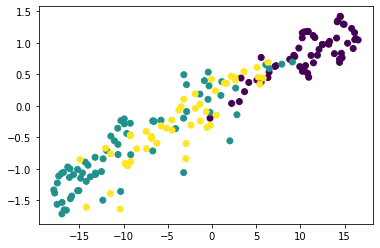

In [108]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=wine.target)